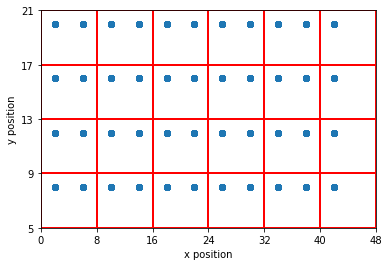

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("./IndoorFingerprint.csv")

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df["X"],df["Y"])

x_ticks = np.arange(0, 49, 8)
y_ticks = np.arange(5, 22, 4)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid(color='r', linestyle='-', linewidth=2)
plt.ylabel("y position")
plt.xlabel("x position")
plt.show()
    

In [34]:
print(sorted(list(set(df['X']))))
print(set(df['Y']))

[2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0, 30.0, 34.0, 38.0, 42.0]
{8.0, 16.0, 12.0, 20.0}


In [155]:
parse_dict = dict({'2.0+8.0': 1, '6.0+8.0': 1, '10.0+8.0': 2, '14.0+8.0': 2, '18.0+8.0': 3, '22.0+8.0': 3, 
          '26.0+8.0': 4, '30.0+8.0': 4, '34.0+8.0': 5, '38.0+8.0': 5, '42.0+8.0': 6,
          '2.0+12.0': 7, '6.0+12.0': 7, '10.0+12.0': 8, '14.0+12.0': 8, '18.0+12.0': 9, '22.0+12.0': 9, 
          '26.0+12.0': 10, '30.0+12.0': 10, '34.0+12.0': 11, '38.0+12.0': 11, '42.0+12.0': 12,
          '2.0+16.0': 13, '6.0+16.0': 13, '10.0+16.0': 14, '14.0+16.0': 14, '18.0+16.0': 15, '22.0+16.0': 15, 
          '26.0+16.0': 16, '30.0+16.0': 16, '34.0+16.0': 17, '38.0+16.0': 17, '42.0+16.0': 18,
          '2.0+20.0': 19, '6.0+20.0': 19, '10.0+20.0': 20, '14.0+20.0': 20, '18.0+20.0': 21, '22.0+20.0': 21, 
          '26.0+20.0': 22, '30.0+20.0': 22, '34.0+20.0': 23, '38.0+20.0': 23, '42.0+20.0': 24
         })

In [161]:
mask_test = np.loadtxt('mask_test.csv',dtype="i")
mask_2 = list(range(6600))
mask_test = sorted(mask_test)
aux = sorted(mask_test, reverse=True)
for i in range(len(aux)):
    del mask_2[aux[i]]
test = df.ix[mask_test]
train = df.ix[mask_2]

x_train = train.ix[:, 2:]
x_test = test.ix[:, 2:]
y_train = list()
y_test = list()

import keras
for i in range(len(mask_2)):
    y_train.append(parse_dict[str(df['X'][mask_2[i]])+'+'+str(df['Y'][mask_2[i]])]-1)
y_train = keras.utils.to_categorical(y_train, 24)

for i in range(len(mask_test)):
    y_test.append(parse_dict[str(df['X'][mask_test[i]])+'+'+str(df['Y'][mask_test[i]])]-1)
y_test = keras.utils.to_categorical(y_test, 24)

In [162]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [164]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(128, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(64,  kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(32, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(24, kernel_initializer='he_uniform',activation='softmax'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

metrics_train = list()
metrics_test = list()
for i in range(25):
    model.fit(x_train, y_train, epochs=1, verbose=1, validation_data=(x_test, y_test))
    metrics_train.append(model.evaluate(x_train, y_train))
    metrics_test.append(model.evaluate(x_test, y_test))

Train on 4620 samples, validate on 1980 samples
Epoch 1/1
1980/1980 [==============================] - 0s 61us/step
Train on 4620 samples, validate on 1980 samples
Epoch 1/1
1980/1980 [==============================] - 0s 59us/step
Train on 4620 samples, validate on 1980 samples
Epoch 1/1
1980/1980 [==============================] - 0s 66us/step
Train on 4620 samples, validate on 1980 samples
Epoch 1/1
1980/1980 [==============================] - 0s 61us/step

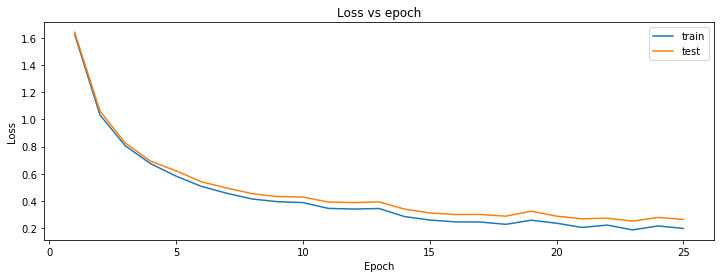

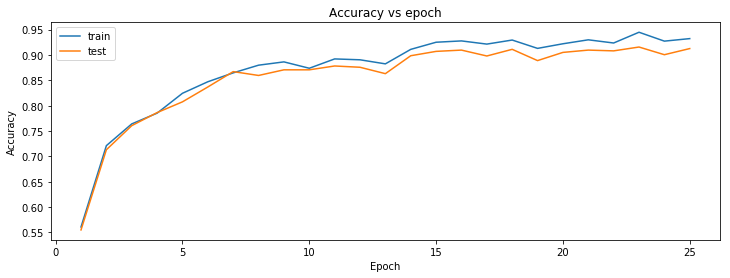

In [165]:
acc_train_list = list()
acc_test_list = list()
loss_train_list = list()
loss_test_list = list()
for i in range(len(metrics_train)):
    acc_train_list.append(metrics_train[i][1])
    acc_test_list.append(metrics_test[i][1])
    loss_train_list.append(metrics_train[i][0])
    loss_test_list.append(metrics_test[i][0])

import matplotlib.pyplot as plt    
n_epoch = list(range(1,26))
fig = plt.figure(figsize = (12,4))
plt.plot(n_epoch, loss_train_list, '-', label='train')
plt.plot(n_epoch, loss_test_list, '-', label='test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs epoch')
plt.show()

fig = plt.figure(figsize = (12,4))
plt.plot(n_epoch, acc_train_list, '-', label='train')
plt.plot(n_epoch, acc_test_list, '-', label='test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs epoch')
plt.show()

In [178]:
print(y_train[4300])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.]
